In [2]:
# Import all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix)
from imblearn.over_sampling import SMOTE



In [3]:
# Read train dataset
train_csv = pd.read_csv("/home/shinde/Documents/personal_projects/Machine_failure/playground-series-s3e17/train.csv")
train_csv.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


<ipython-input-7-e265d7e4db2b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method = "spearman")


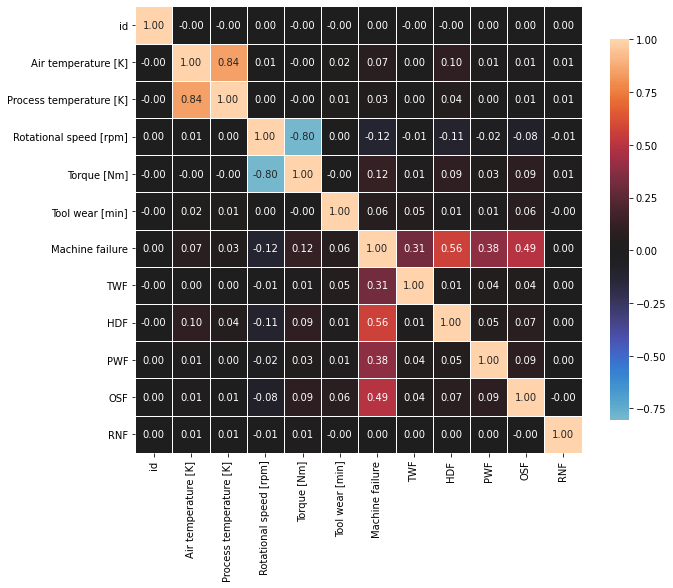

In [7]:
# Plot heatmap showing correlations between the features
def correlation_heatmap(df):
    correlations = df.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(train_csv)

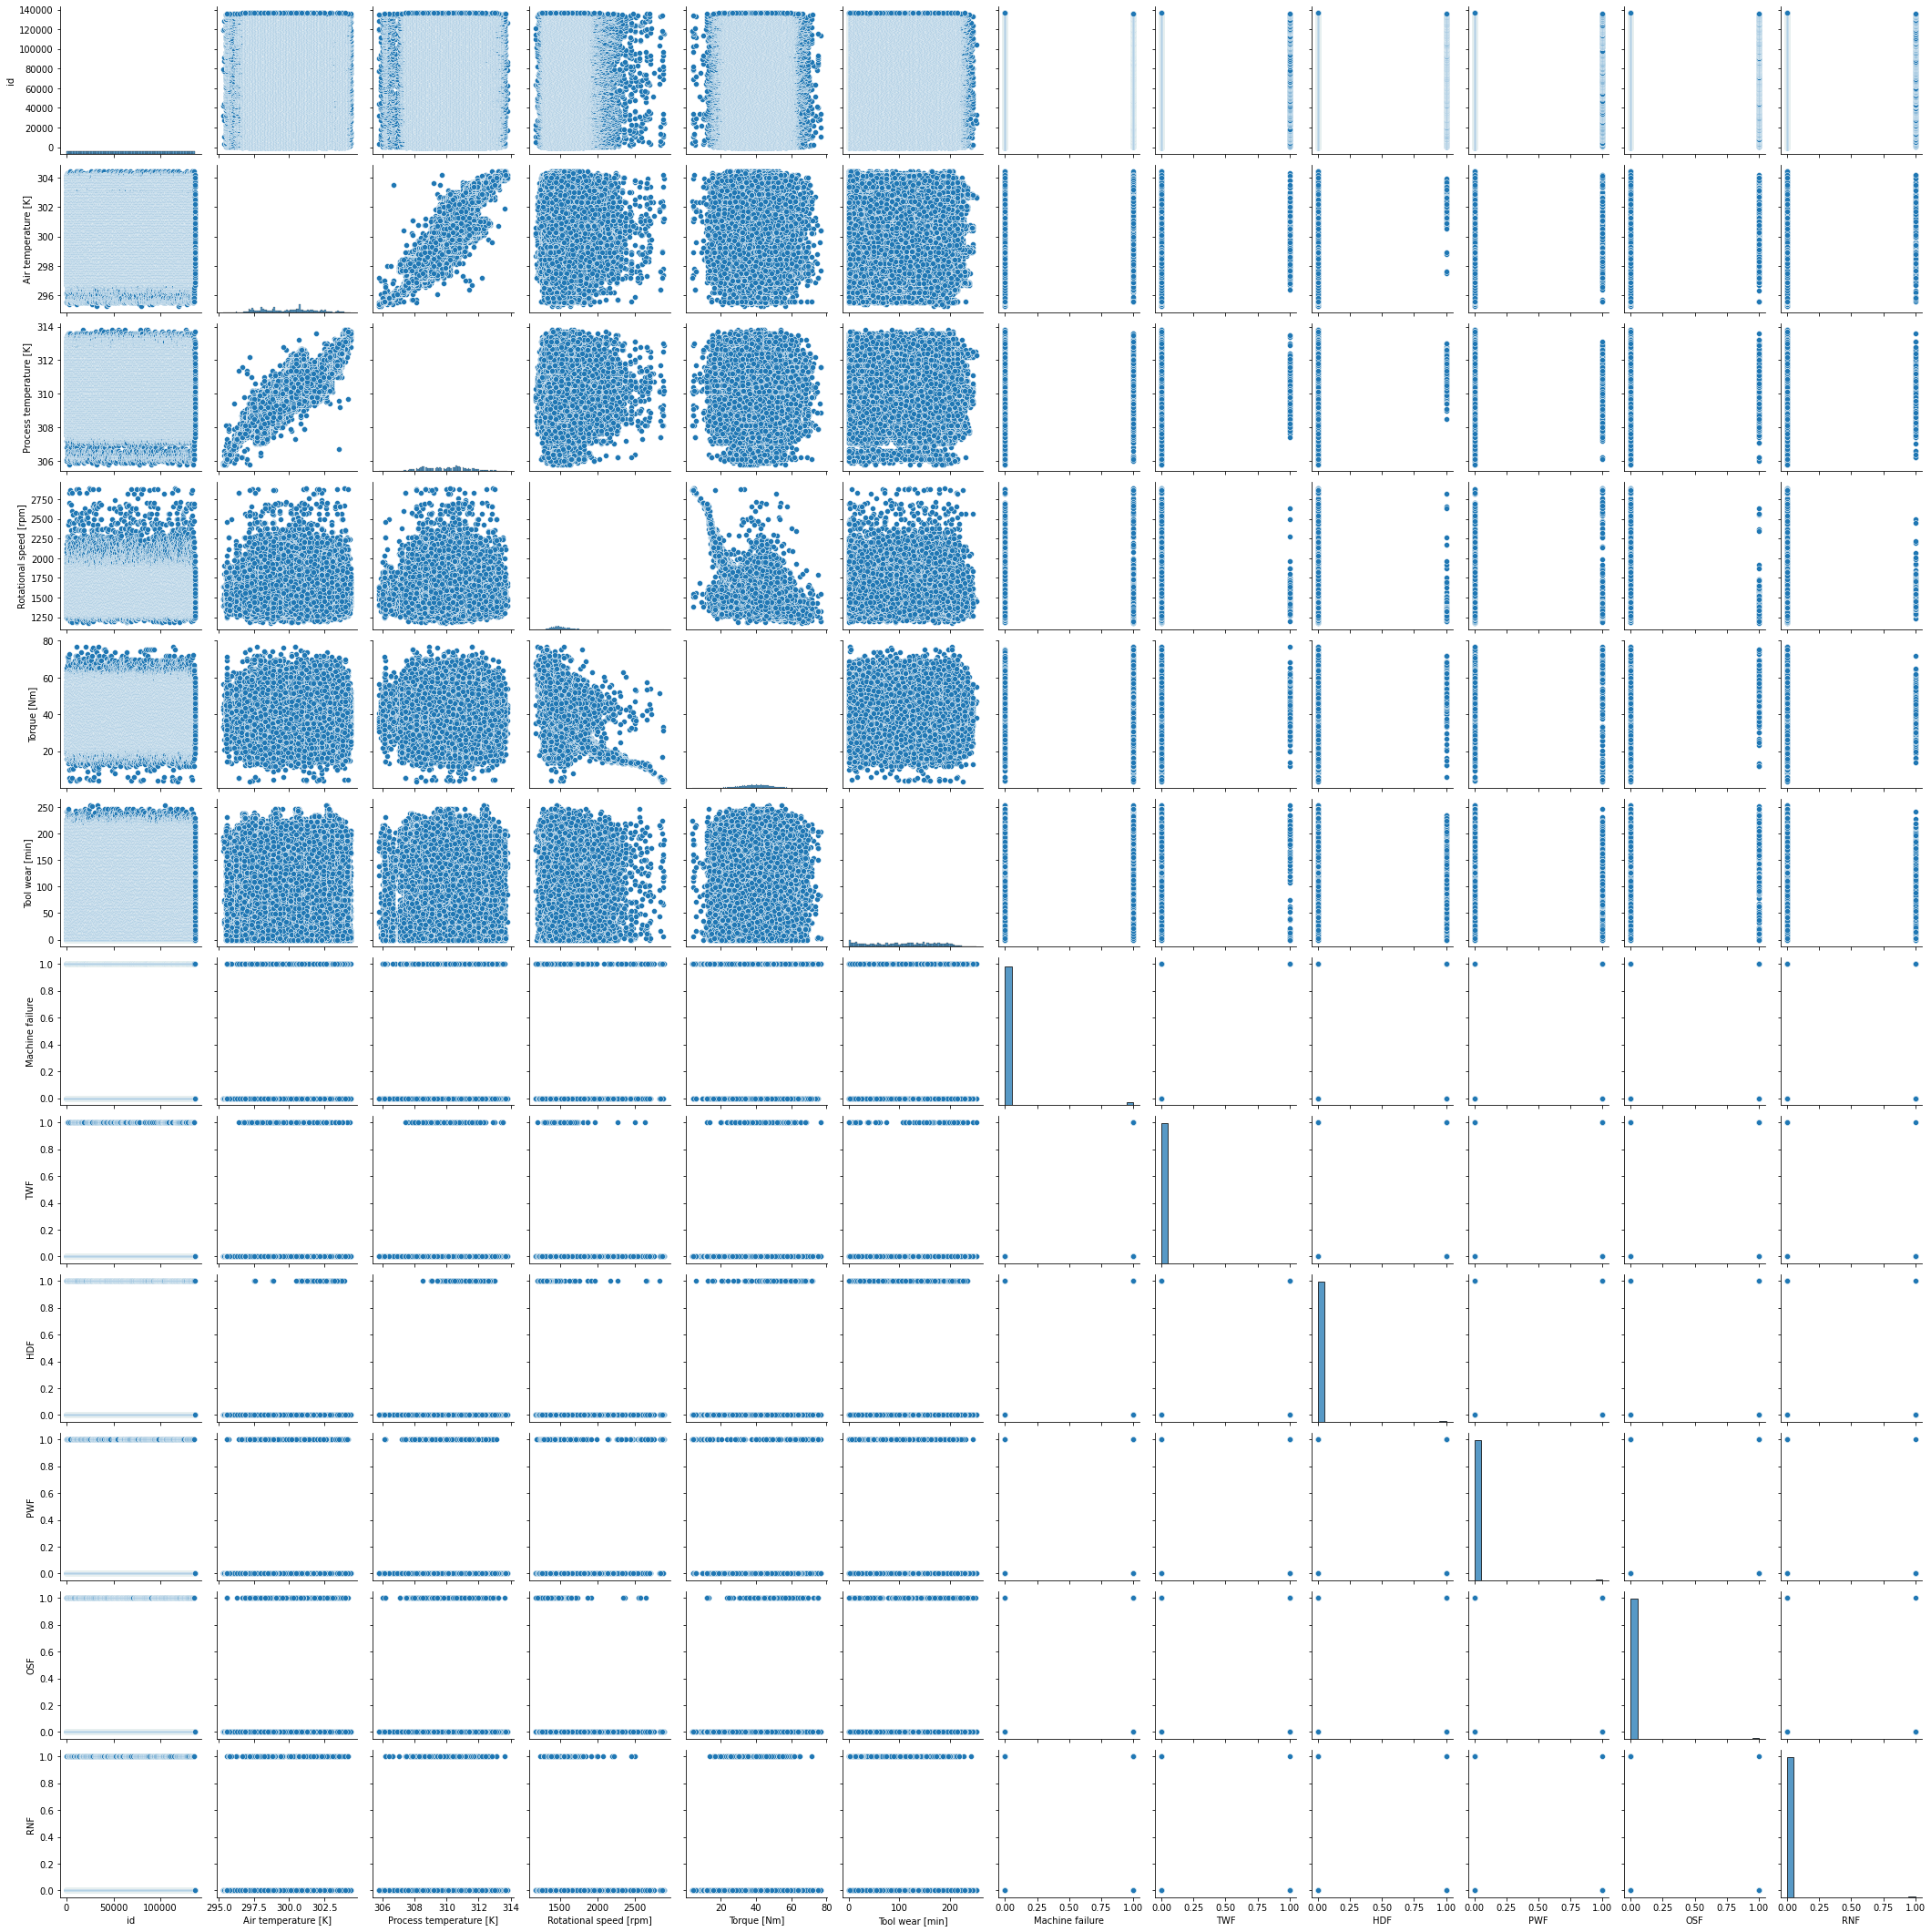

In [8]:
# Plot a pair plot to see the correlations
sns.pairplot(train_csv)

In [119]:
# drop ProdID & RNF (it has very low relation to Machine Failure)
df = train_csv.drop(['Product ID', 'RNF'], axis=1)

# create Power
df['Power'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']

# create tempdiff
df['TempDiff'] = df['Process temperature [K]'] - df['Air temperature [K]']

# Fails aggregation
df['Fails'] = df['TWF'] + df['HDF'] + df['PWF'] + df['OSF']

df = df.drop(["id", "Process temperature [K]", "Torque [Nm]", "Rotational speed [rpm]", "Air temperature [K]"], axis = 1)
# df = df.drop(["Rotational speed [rpm]", "Torque [Nm]", "Process temperature [K]", "Air temperature [K]", "TWF", "HDF", "PWF", "OSF", 'id'], axis = 1)
# # one-hot encoding on Type
# b = pd.get_dummies(df['Type'], drop_first=True)
# df = df.drop(['Type'], axis=1)
# df = df.merge(b, on='id', how='right')



In [120]:
df.describe()

,Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,Power,TempDiff,Fails
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,60423.953944,10.078295,0.013069
std,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,9531.546208,0.984934,0.122033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5829.600000,3.200000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54199.700000,9.300000,0.000000
50%,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60258.000000,9.900000,0.000000
75%,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66502.200000,11.000000,0.000000
max,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,152856.200000,15.000000,3.000000


<ipython-input-121-82b65cec12ee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = Xtrain_tran.corr(method = "spearman")


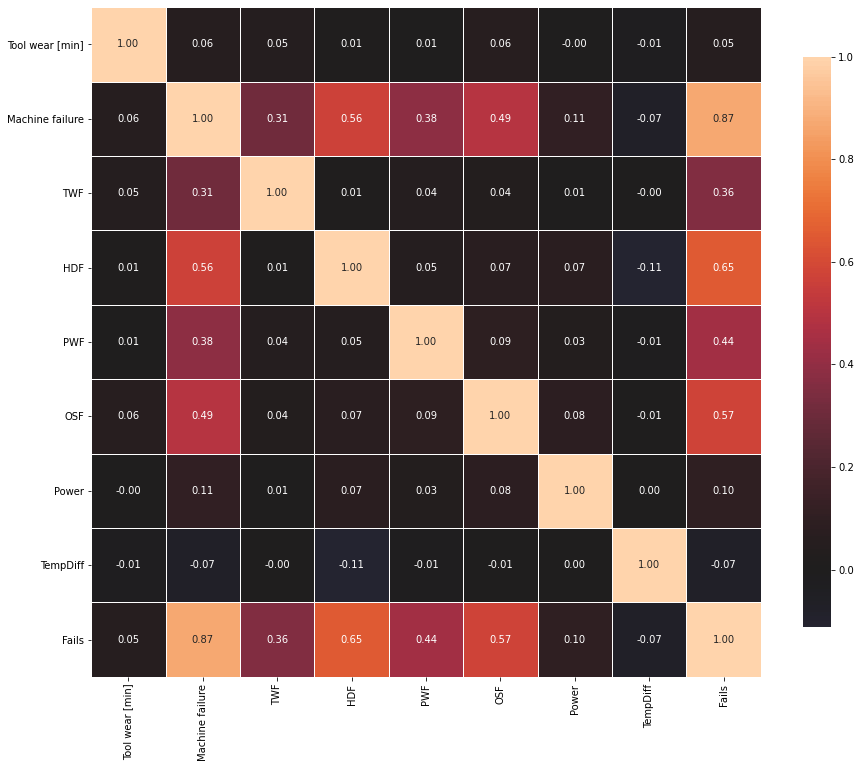

In [121]:
# Plot the heatmap again to check how well the new columns (like Tempdiff) relate to each other
def correlation_heatmap(Xtrain_tran):
    correlations = Xtrain_tran.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(df)


In [122]:
# Separate the input and target variables
y = df.pop('Machine failure')
X = df
X.head(10)


,Type,Tool wear [min],TWF,HDF,PWF,OSF,Power,TempDiff,Fails
0,L,140,0,0,0,0,57615.6,9.0,0
1,M,200,0,0,0,0,51186.9,9.5,0
2,L,25,0,0,0,0,47832.5,9.2,0
3,L,197,0,0,0,0,67513.2,9.9,0
4,M,34,0,0,0,0,58091.4,11.0,0
5,M,65,0,0,0,0,60160.9,10.5,0
6,L,156,0,0,0,0,60617.7,11.4,0
7,L,67,0,0,0,0,61302.9,11.4,0
8,L,13,0,0,0,0,55545.6,11.1,0
9,L,98,0,0,0,0,77125.1,11.8,0


In [123]:
# Split data to train and test

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = 0.2, random_state = 99, stratify = y)

In [124]:
Xtrain.shape, ytrain.shape, yval.shape, Xval.shape

((109143, 9), (109143,), (27286,), (27286, 9))

In [125]:
Xtrain.columns

Index(['Type', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'Power',
       'TempDiff', 'Fails'],
      dtype='object')

# Feature Engineering

In [126]:
# Store all the fe components 
fe1 = ColumnTransformer([
    ("ohe_type", OneHotEncoder(sparse_output=False), ["Type"]),
    # ("scale_torque", StandardScaler(),["Torque [Nm]"]),
# ("scale_tool", StandardScaler(),["Tool wear [min]"]),
# ("scale_rs", StandardScaler(),["Rotational speed [rpm]"]),
], remainder = 'passthrough')

fe1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_type', OneHotEncoder(sparse_output=False),
                                 ['Type'])])

In [127]:
# fit the column transformer on the training data
fe1.fit(Xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_type', OneHotEncoder(sparse_output=False),
                                 ['Type'])])

In [128]:
# transform the training data
Xtrain_tran = fe1.transform(Xtrain)
Xtrain_tran = pd.DataFrame(Xtrain_tran, columns=fe1.get_feature_names_out())
Xtrain_tran

,ohe_type__Type_H,ohe_type__Type_L,ohe_type__Type_M,remainder__Tool wear [min],remainder__TWF,remainder__HDF,remainder__PWF,remainder__OSF,remainder__Power,remainder__TempDiff,remainder__Fails
0,0.0,1.0,0.0,188.0,0.0,0.0,0.0,0.0,57226.2,11.3,0.0
1,0.0,1.0,0.0,60.0,0.0,0.0,0.0,0.0,50670.0,9.6,0.0
2,0.0,0.0,1.0,150.0,0.0,0.0,0.0,0.0,52896.5,9.6,0.0
3,0.0,0.0,1.0,85.0,0.0,0.0,0.0,0.0,65079.3,10.9,0.0
4,0.0,0.0,1.0,152.0,0.0,0.0,0.0,0.0,64862.0,9.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
109138,0.0,1.0,0.0,78.0,0.0,0.0,0.0,0.0,62555.4,9.5,0.0
109139,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,45620.1,10.9,0.0
109140,1.0,0.0,0.0,166.0,0.0,0.0,0.0,0.0,69300.0,9.0,0.0
109141,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,68400.0,10.1,0.0


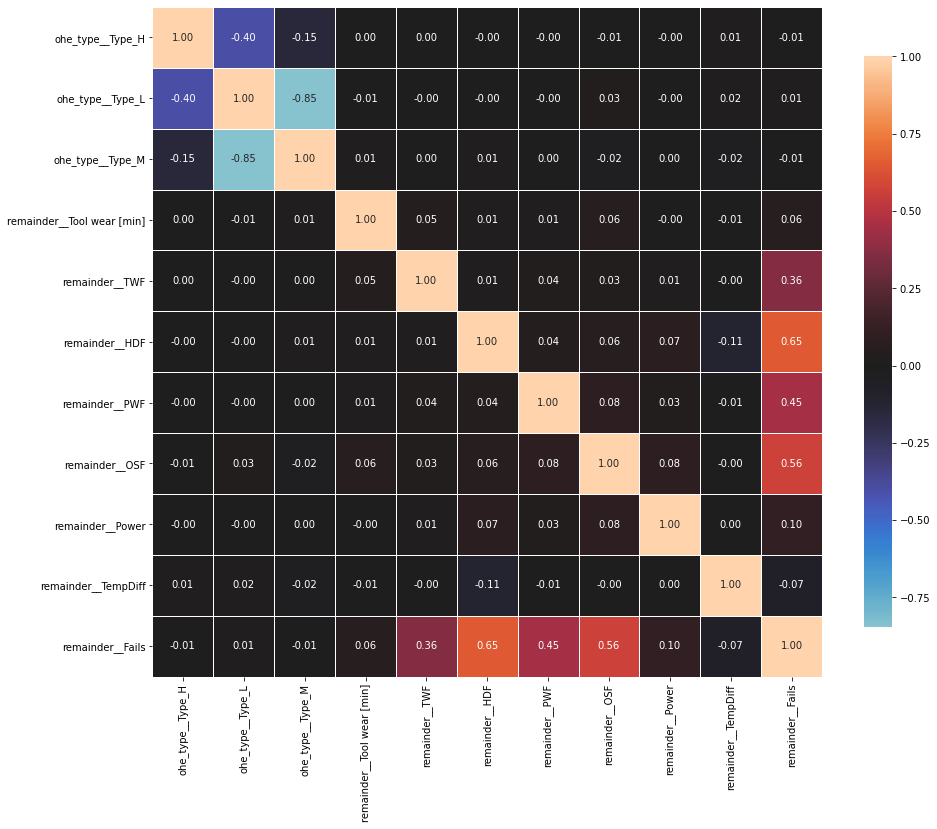

In [129]:
def correlation_heatmap(Xtrain_tran):
    correlations = Xtrain_tran.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(Xtrain_tran)


In [130]:
# Drop ohe_type__Type_M as ohe_type__Type_L works really well
Xtrain_tran = Xtrain_tran.drop(['ohe_type__Type_M'], axis=1)

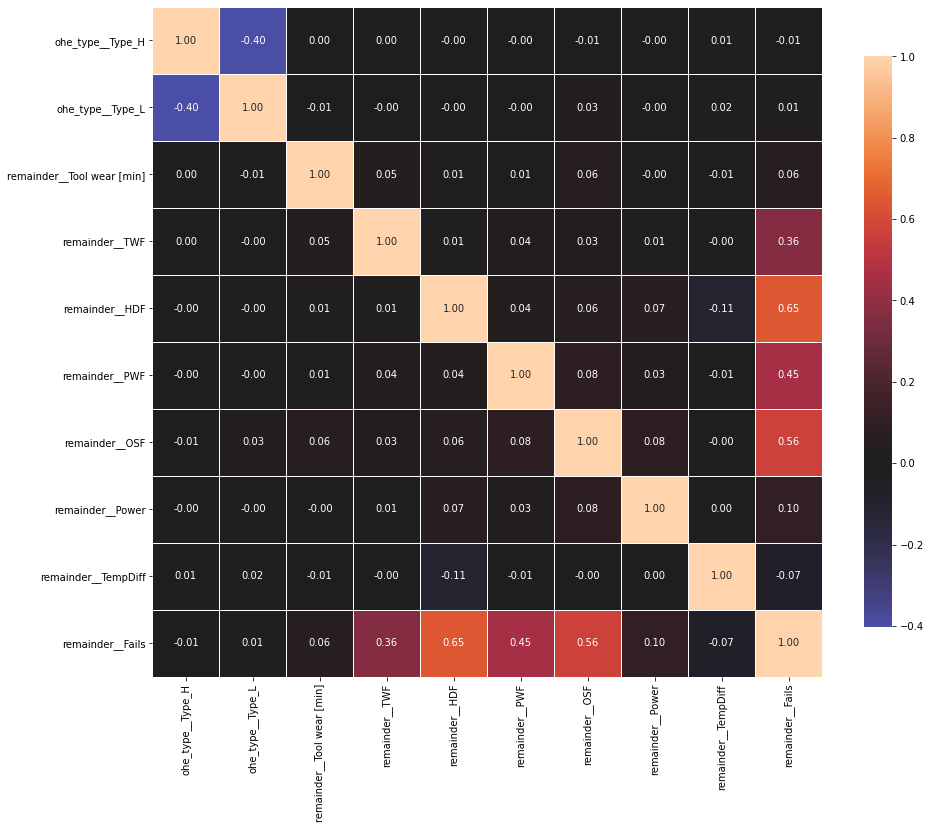

In [131]:
def correlation_heatmap(Xtrain_tran):
    correlations = Xtrain_tran.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(Xtrain_tran)

In [132]:
# Transform validation set
Xval_tran = fe1.transform(Xval)
Xval_tran = pd.DataFrame(Xval_tran, columns=fe1.get_feature_names_out())
Xval_tran = Xval_tran.drop(['ohe_type__Type_M'], axis=1)


# Balancing the data with SMOTE

In [133]:
sm=SMOTE(sampling_strategy="minority")

X_os,y_os=sm.fit_resample(Xtrain_tran,ytrain)
Xval_os,yval_os=sm.fit_resample(Xval_tran,yval)


In [134]:
Xtrain_tran.columns

Index(['ohe_type__Type_H', 'ohe_type__Type_L', 'remainder__Tool wear [min]',
       'remainder__TWF', 'remainder__HDF', 'remainder__PWF', 'remainder__OSF',
       'remainder__Power', 'remainder__TempDiff', 'remainder__Fails'],
      dtype='object')

In [135]:
X_os = X_os.rename(columns={"scale_torque__Torque [Nm]": "scale_torque__Torque", 
                                          "scale_tool__Tool wear [min]": "scale_tool__Tool wear",
                                          "scale_temp__Air temperature [K]":"scale_temp__Air temperature",
                                          "remainder__Process temperature [K]": "remainder__Process temperature",
                                          "remainder__Rotational speed [rpm]":"remainder__Rotational speed",
                                          "remainder__Air temperature [K]" : "remainder__Air temperature",
                                          "remainder__Torque [Nm]" : "remainder__Torque",
                                          "remainder__Tool wear [min]":"remainder__Tool wear"
                                          })

Xval_os = Xval_os.rename(columns={"scale_torque__Torque [Nm]": "scale_torque__Torque", 
                                          "scale_tool__Tool wear [min]": "scale_tool__Tool wear",
                                          "scale_temp__Air temperature [K]":"scale_temp__Air temperature",
                                          "remainder__Process temperature [K]": "remainder__Process temperature",
                                          "remainder__Rotational speed [rpm]":"remainder__Rotational speed",
                                          "remainder__Air temperature [K]" : "remainder__Air temperature",
                                          "remainder__Torque [Nm]" : "remainder__Torque",
                                          "remainder__Tool wear [min]":"remainder__Tool wear"
                                          })

### LightGBM

In [136]:
X_os.columns

Index(['ohe_type__Type_H', 'ohe_type__Type_L', 'remainder__Tool wear',
       'remainder__TWF', 'remainder__HDF', 'remainder__PWF', 'remainder__OSF',
       'remainder__Power', 'remainder__TempDiff', 'remainder__Fails'],
      dtype='object')

In [151]:
import lightgbm as lgb
d_train = lgb.Dataset(X_os,  label=y_os)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 107425, number of negative: 107425
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 214850, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


### Predictions for train set

In [152]:
y_pred=clf.predict(X_os)

#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

In [153]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_os, y_pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_os)

In [154]:
cm

array([[107413,     12],
       [  4247, 103178]])

In [155]:
# Print Accuracy
accuracy

0.9801768675820339

### Predictions for val set

In [156]:
y_val_pred=clf.predict(Xval_os)

#convert into binary values
for i in range(0, len(y_val_pred)):
    if y_val_pred[i]>=.5:       # setting threshold to .5
        y_val_pred[i]=1
    else:  
        y_val_pred[i]=0

In [157]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yval_os, y_val_pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_val_pred,yval_os)

In [158]:
cm 

array([[26855,     1],
       [  816, 26040]])

In [159]:
accuracy

0.9847892463509086

In [164]:
# Apply model on the test.csv
# Read test csv

test_csv = pd.read_csv("/home/shinde/Documents/personal_projects/Machine_failure/playground-series-s3e17/test.csv")

test_csv.head(10)

# drop ProdID i RNF
test_csv = test_csv.drop(['Product ID', 'RNF'], axis=1)

# create Power
test_csv['Power'] = test_csv['Rotational speed [rpm]'] * test_csv['Torque [Nm]']

# create tempdiff
test_csv['TempDiff'] = test_csv['Process temperature [K]'] - test_csv['Air temperature [K]']

# Fails aggregation
test_csv['Fails'] = test_csv['TWF'] + test_csv['HDF'] + test_csv['PWF'] + test_csv['OSF']

test_csv = test_csv.drop(["Process temperature [K]", "Torque [Nm]", "Rotational speed [rpm]", "Air temperature [K]"], axis = 1)

# # # transform the test data
test_tran = fe1.transform(test_csv)
test_tran_df = pd.DataFrame(test_tran, columns=fe1.get_feature_names_out())
test_tran_df = test_tran_df.drop(['ohe_type__Type_L'], axis=1)

In [165]:
prob_clf = pd.DataFrame(clf.predict(test_tran_df), columns = ["Machine failure"])

In [166]:
submission_clf = pd.concat([test_csv["id"], prob_clf], axis = 1)
submission_clf.to_csv("submissions_predicted_xg_smote_clf_fe2.csv")